## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

'\n# TODO: Write a function that takes an image, object points, and image points\n# performs the camera calibration, image distortion correction and \n# returns the undistorted image\ndef cal_undistort(img, objpoints, imgpoints):\n    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)\n    undist = cv2.undistort(img, mtx, dist, None, mtx)  # undist war im Kurs dst (destination)\n    return undist\n\nundistorted = cal_undistort(img, objpoints, imgpoints)\n'

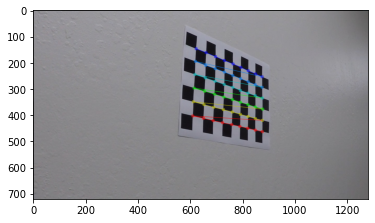

In [33]:
%matplotlib inline
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32) 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # nx=9 and ny=6

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

"""
img = plt.imread('camera_cal/calibration1.jpg')
plt.imshow(img)
"""

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg') # importing the glob API

# print(images[0]) # DEBUG

# Step through the list and search for chessboard corners
for fname in images:
    img = plt.imread(fname)
    # no cv2.undistort(img, mtx, dist, None) here because cal images are not distorted (only the first one a little bit maybe)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # why? to find corners easily in the next step
                                                # if you are using cv2.imread() or the glob API, as happens here,
                                                # this will read in a BGR image and you should convert to grayscale
                                                # using cv2.COLOR_BGR2GRAY.

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None) # nx=9 and ny=6 (ret=return)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)


"""
# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)  # undist war im Kurs dst (destination)
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)
"""

# Camera calibration, given object points, image points, and the shape of the grayscale image
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## And so on and so forth...